### Criação das bolinhas

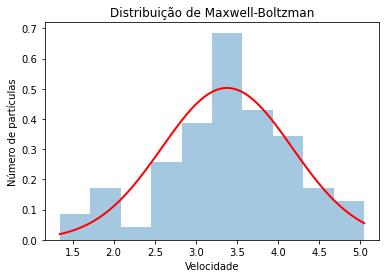

In [74]:
import numpy as np
import pygame
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inicialização do pygame
pygame.init()

# Parâmetros
num_atoms = 125
temperatura = 8 # em Kelvin
raio = 4
massa = 20
raioB = 8
massaB = 30

# Parâmetros da janela
width, height = 800, 600
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Simulação da Colisão Elástica")

# Cores
white = (255, 255, 255)
red = (255, 0, 0)
azul = (0, 0, 255)
color = red
### Preciso definir as bolinhas, quem são e como serão representadas

## Tem uma velocidade no eixo x, velocidade no eixo y, posição inicial em x e posição inicial em y

## Vamos fazer a representação das bolinhas utilizando matrizes do numpy, preenchida com zeros e 1, sendo 1 a representação dela
class atomo:
    """Essa classe irá representar os nossos átomos,
    
    Terá a posição inicial deles, sua velocidade em x e y, e o seu raio."""
    
    def __init__(self, tipo, x,y, raio, temperatura, massa, syles=None):
        '''definindo como que cada parâmetro irá se inicializar'''
    
        #Para gerar os valores aleatórios vamos utilizar uma função do numpy chamda random uniform que gera valores aleatórios seguindo 
        ## um intervalo de valores específicado
        self.tipo = tipo
        self.p = np.array((x,y)) #defino a posição das bolinhas
        vx = random.randint(-4,4)
        vy = random.randint(-4,4)
        self.v = np.array((vx,vy))
        self.caract = np.array((temperatura,massa,raio)) #Definindo características das bolinhas
      
    # Movimento das bolinhas
    
    def movimento(self, dt = 0.75):
        
    
        self.p = self.p + self.v *dt

        #Restringir a região das bolinhas

        self.p[0] = max(self.caract[2], min(self.p[0], width - self.caract[2]))
        self.p[1] = max(self.caract[2], min(self.p[1], height - self.caract[2]))
        
    #Verificando se há colisão entre elas
    
    def verifica_colisao(self,b2):
        distance = math.sqrt((self.p[0] - b2.p[0])**2 + (self.p[1] - b2.p[1])**2)
        return distance <= self.caract[2] + b2.caract[2]
     

    def aplica_colisao(self,b2):
        
        dx = b2.p[0] - self.p[0]
        dy = b2.p[1] - self.p[1]
        
        distancia = math.sqrt(dx**2 + dy**2)
        
        dx_futuro = (b2.p[0] + b2.v[0]) - (self.p[0] + self.v[0])
        dy_futuro = (b2.p[1] + b2.v[1]) - (self.p[1] + self.v[1])
        distancia_futura = math.sqrt(dx_futuro**2 + dy_futuro**2)
        
        if distancia_futura < distancia:
            m1,m2 = 4e-23, 4e-23#self.caract[2]**2, b2.caract[2]**2
            M = m1 + m2
            r1,r2 = self.p, b2.p
            
            d = np.linalg.norm(r1-r2)**2
                
            v1, v2 = abs(self.v), abs(b2.v)
            u1 = v1 - 2*m2/M *(np.dot(v1-v2,r1-r2)/d)* (r1-r2)
            u2 = v2 - 2*m1/M * np.dot(v2-v1,r2-r1)/d * (r2-r1)
            self.v = u1
            b2.v = -u2
    
    def colisao_parede(self):
        
            # Refletir a direção da bola quando colide com as paredes
        if (self.p[0] - self.caract[2] <= 0).any(): #and self.v[0] < 0
            self.v[0] = (-self.v[0])          
            
            
        if (self.p[0] + self.caract[2] >= width).any(): #and self.v[0] > 0:
            self.v[0] = (-self.v[0]) 

        if (self.p[1] - self.caract[2] <= 0).any(): #and self.v[1] < 0:
            self.v[1] = (-self.v[1]) 
            
        if (self.p[1] + self.caract[2] >= height).any(): # and self.v[1] > 0 :
            self.v[1] = (-self.v[1]) 
                

#lista de atomos

atomos = []
tipo = "A"

for _ in range(num_atoms):
    valid_position = False
    while not valid_position:
        x = random.randint(50, width - 50)
        y = random.randint(50, height - 50)
    
        # Verificar se a posição não está muito próxima de outras posições já escolhidas
        if all(math.sqrt((x-atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
            if all(math.sqrt((x - atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
                valid_position = True

    atom = atomo(tipo, x, y, raio, temperatura, massa)
    atomos.append(atom)

# Dicionários com a informações das velocidades e concentração





 # Loop principal
evolucao = {}
tempos = []
concentracoes = []
running = True
clock = pygame.time.Clock()
dt = 0.75
n = -1
while running:
    n+=1
    color = red
    c_A = 0
    c_B = 0
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    window.fill(white)

    for atom in atomos:
        atom.movimento(dt=dt)
        atom.colisao_parede()
        
        if atom.tipo == "A":
            c_A+=1
        
        if atom.tipo == "B":
            c_B+=1
            color = azul
        
        pygame.draw.circle(window, color, (int(atom.p[0]), int(atom.p[1])), atom.caract[2])

    # Verificar colisões
    lista_remover = []
    atomos_num = []
    for i in range(len(atomos)):
        for j in range(i + 1, len(atomos)):
            if atomos[i].verifica_colisao(atomos[j]):
                if atomos[i].tipo == "A" and atomos[i].tipo == atomos[j].tipo: 
                    
                    x_novo = (atomos[i].p[0] + atomos[j].p[0])/2
                    y_novo = (atomos[i].p[1] + atomos[j].p[1])/2
                    
                    atom = atomo("B", x_novo, y_novo, raioB, temperatura, massaB)
                    atomos_num.append(1)
                    atomos.append(atom)
                    
                    lista_remover.append(atomos[i])
                    lista_remover.append(atomos[j])
                    #atomos[i].aplica_colisao(atomos[j])
                    
                else:
                    atomos[i].aplica_colisao(atomos[j])
    
    # problema: o que estava no índice j não está mais, pois a lista mudou de tamanho quando o i foi deletado
    
    if len(lista_remover) != 0:
        for c in lista_remover:
            atomos.remove(c)

    
    pygame.display.flip()
    clock.tick(200)
    
    # Cálculo da velocidade
    concentracoes.append(sum(atomos_num))
    tempos.append(pygame.time.get_ticks())
    if sum(atomos_num) != len(atomos): 
        tempo = pygame.time.get_ticks()
        
    evolucao[n] = {}
    evolucao[n]["tempo"] = n*dt
    
    evolucao[n]["A"] = c_A
    
    evolucao[n]["B"] = c_B
        
    

velocidade_reacao = len(atomos)/tempo

pygame.quit()

velocidades = []

for i in range(len(tempos) - 1):
    velocidades.append(concentracoes[i]/tempos[i])



# Coletar as velocidades das partículas ao longo do tempo
velocidades = []
for a in atomos:
    v_norm = (((a.v[0])**2)+((a.v[1])**2))**(1/2)
    velocidades.append(v_norm)

# Criar um histograma das velocidades
plt.figure()
plt.hist(velocidades, bins=10, density=True, alpha=0.4)

# Ajustar os dados a uma distribuição gaussiana usando a função norm.fit()
mu, sigma = norm.fit(velocidades)

# Calcular a distribuição gaussiana ajustada
x = np.linspace(np.min(velocidades), np.max(velocidades), 100)
normalizado = norm.pdf(x, mu, sigma)
plt.plot(x, normalizado,  color='red',linewidth=2)



plt.xlabel('Velocidade')
plt.ylabel('Número de partículas')
plt.title('Distribuição de Maxwell-Boltzman')
plt.show()
        

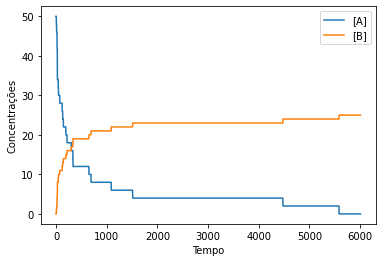

In [58]:
#Calcula as variações de concentração

tempos = []
concentracao_A = []
concentracao_B = []

for item in evolucao:
    tempos.append(evolucao[item]["tempo"])
    concentracao_A.append(evolucao[item]["A"])
    concentracao_B.append(evolucao[item]["B"])

plt.plot(tempos, concentracao_A, label = '[A]')
plt.plot(tempos, concentracao_B , label = '[B]')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Concentrações')
plt.show()

In [59]:
def VFT(T, log_concentracao_A0, K):
    """Computa o logaritmo da viscosidade pela eq. de VFT."""
    log_concentracao = log_concentracao_A0 + K*T #/ (T - T0) 
    return log_concentracao

In [60]:
from lmfit import Model
x = tempos
y_log = concentracao_A
modelo_VFT = Model(VFT)

print(f'Variável independente: {modelo_VFT.independent_vars}')
print(f'Parâmetros do modelo: {modelo_VFT.param_names}')

params = modelo_VFT.make_params(log_concentracao_A0 =-8, K=1000)

#print(params)

resultado_fit = modelo_VFT.fit(y_log, params, T=x)

print(resultado_fit.fit_report())
#print(resultado_fit.fit_report())

Variável independente: ['T']
Parâmetros do modelo: ['log_concentracao_A0', 'K']
[[Model]]
    Model(VFT)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8011
    # variables        = 2
    chi-square         = 135230.089
    reduced chi-square = 16.8847657
    Akaike info crit   = 22644.3845
    Bayesian info crit = 22658.3617
[[Variables]]
    log_concentracao_A0:  12.1070822 +/- 0.09181074 (0.76%) (init = -8)
    K:                   -0.00224726 +/- 2.6470e-05 (1.18%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(log_concentracao_A0, K) = -0.866


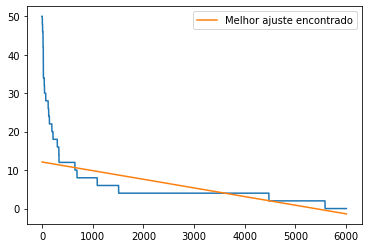

In [61]:
plt.plot(x, y_log)
#plt.plot(x, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(x, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.legend()
plt.show()

In [62]:

def VFT(T, log_concentracao_A0, K, T0):
    log_concentracao = log_concentracao_A0 +  K / (T - T0)
    return log_concentracao

x = tempos
y_log = concentracao_A

modelo_VFT = Model(VFT)
 
print(f'Variável independente: {modelo_VFT.independent_vars}')

print(f'Parâmetros do modelo: {modelo_VFT.param_names}')
 
params = modelo_VFT.make_params(log_concentracao_A0=-8, K=1000, T0=-100)
 
resultado_fit = modelo_VFT.fit(y_log, params, T=x)

#print(resultado_fit.fit_report())

Variável independente: ['T']
Parâmetros do modelo: ['log_concentracao_A0', 'K', 'T0']


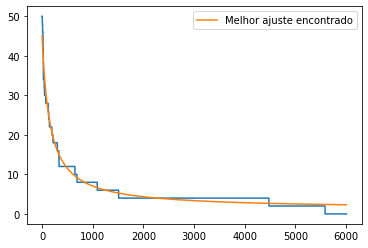

In [63]:
plt.plot(x, y_log)
#plt.plot(x, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(x, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.legend()
plt.show()

In [64]:
print(resultado_fit.best_fit)
print(tempos)

[45.12529191 44.91122977 44.69924488 ...  2.31212451  2.31199166
  2.31185883]
[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6.0, 6.75, 7.5, 8.25, 9.0, 9.75, 10.5, 11.25, 12.0, 12.75, 13.5, 14.25, 15.0, 15.75, 16.5, 17.25, 18.0, 18.75, 19.5, 20.25, 21.0, 21.75, 22.5, 23.25, 24.0, 24.75, 25.5, 26.25, 27.0, 27.75, 28.5, 29.25, 30.0, 30.75, 31.5, 32.25, 33.0, 33.75, 34.5, 35.25, 36.0, 36.75, 37.5, 38.25, 39.0, 39.75, 40.5, 41.25, 42.0, 42.75, 43.5, 44.25, 45.0, 45.75, 46.5, 47.25, 48.0, 48.75, 49.5, 50.25, 51.0, 51.75, 52.5, 53.25, 54.0, 54.75, 55.5, 56.25, 57.0, 57.75, 58.5, 59.25, 60.0, 60.75, 61.5, 62.25, 63.0, 63.75, 64.5, 65.25, 66.0, 66.75, 67.5, 68.25, 69.0, 69.75, 70.5, 71.25, 72.0, 72.75, 73.5, 74.25, 75.0, 75.75, 76.5, 77.25, 78.0, 78.75, 79.5, 80.25, 81.0, 81.75, 82.5, 83.25, 84.0, 84.75, 85.5, 86.25, 87.0, 87.75, 88.5, 89.25, 90.0, 90.75, 91.5, 92.25, 93.0, 93.75, 94.5, 95.25, 96.0, 96.75, 97.5, 98.25, 99.0, 99.75, 100.5, 101.25, 102.0, 102.75, 103.5, 104.25, 105.0, 105.75, 106

In [65]:
(44.9112297 - 45.12529191)/0.75

-0.28541628000000213

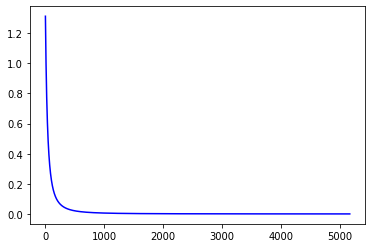

In [38]:
y_p = np.diff(resultado_fit.best_fit) / np.diff(x)
x_p = (np.array(x)[:-1] + np.array(x)[1:]) / 2

derivada = np.array(y_p)*-1
plt.figure(1)
#plt.plot(x, resultado_fit.best_fit, 'r')
plt.plot(x_p, derivada, 'b')
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

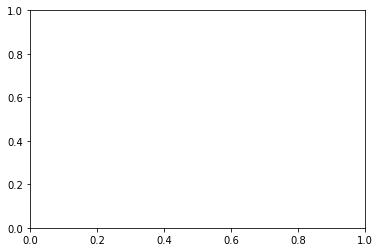

In [73]:
derivada = [0.29, 1.57, 5.91]
num_atomos = [50, 100, 150]
plt.scatter(indices, lista_de_pontos, label='Pontos', color='blue', marker='o')
plt.show()